In [1]:
!pip install tensorflow
!pip install visualkeras

Conjunto de entrenamiento: (34799, 32, 32, 3), (34799,)
Conjunto de validación: (4410, 32, 32, 3), (4410,)
Conjunto de prueba: (12630, 32, 32, 3), (12630,)


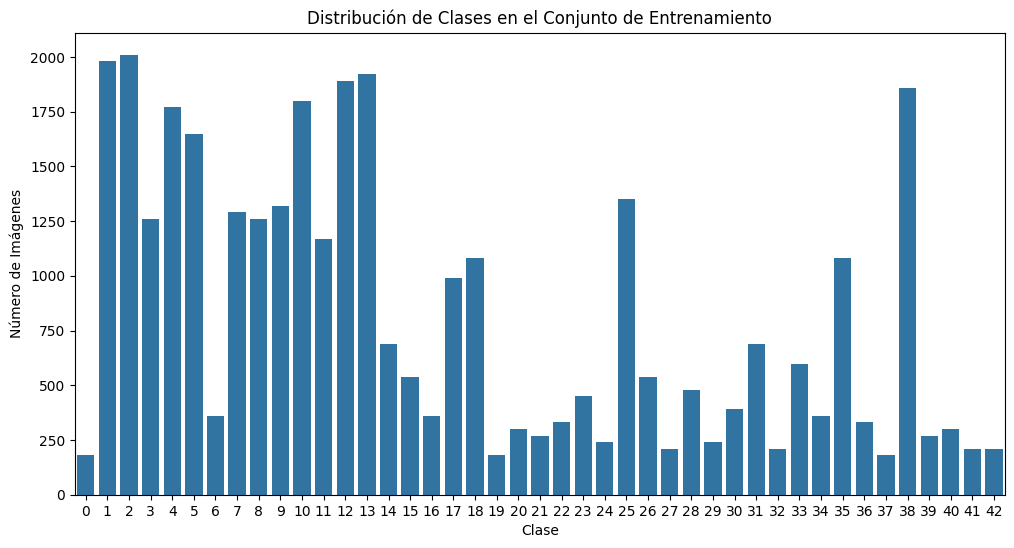

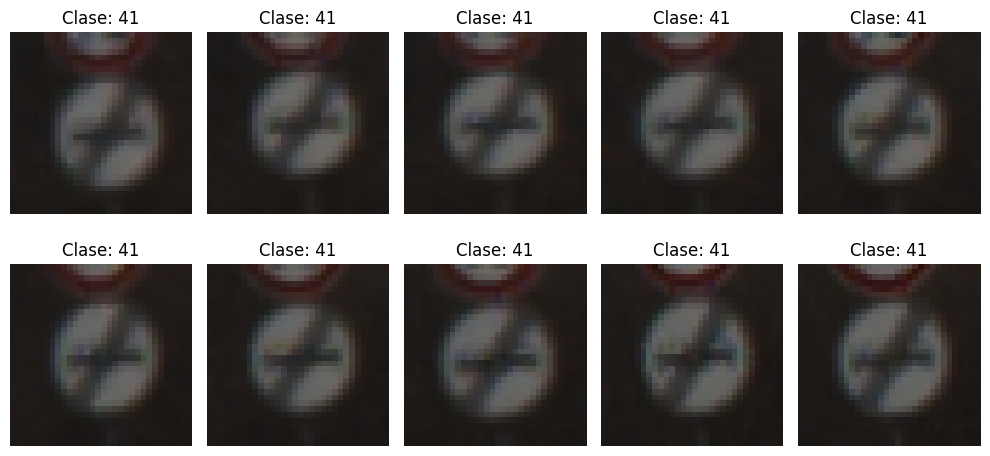

Valores máximos tras normalización: 1.0, mínimos: 0.0
Ejemplo de etiqueta codificada: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Función para cargar datos desde un archivo pickle
def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data['features'], data['labels']

X_train, y_train = load_data('./entrenamiento.p')
X_valid, y_valid = load_data('./validacion.p')
X_test, y_test = load_data('./prueba.p')


# Mostrar las dimensiones de los datos
print(f'Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}')
print(f'Conjunto de validación: {X_valid.shape}, {y_valid.shape}')
print(f'Conjunto de prueba: {X_test.shape}, {y_test.shape}')

# Mostrar la distribución de las etiquetas en el conjunto de entrenamiento
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.show()

# Visualizar algunas imágenes de ejemplo del conjunto de entrenamiento
def plot_images(images, labels, num_rows=2, num_cols=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f'Clase: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(X_train, y_train)

# Normalizar las imágenes dividiendo por 255.0
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# Confirmar la normalización
print(f'Valores máximos tras normalización: {X_train.max()}, mínimos: {X_train.min()}')

# Codificación one-hot para las etiquetas
y_train = to_categorical(y_train, num_classes=43)
y_valid = to_categorical(y_valid, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

# Verificar la codificación
print(f'Ejemplo de etiqueta codificada: {y_train[0]}')


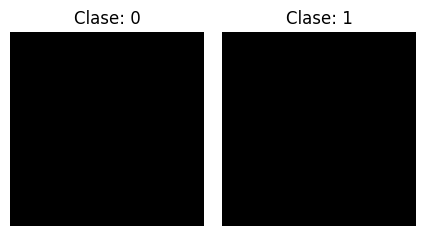

In [3]:


X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# Codificación one-hot para las etiquetas
y_train = to_categorical(y_train, num_classes=43)
y_valid = to_categorical(y_valid, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

# Función para mostrar una imagen de cada clase
def plot_one_image_per_class(images, labels):
    class_images = {}
    for img, lbl in zip(images, labels):
        class_id = np.argmax(lbl)
        if class_id not in class_images:
            class_images[class_id] = img
        # Salir si hemos encontrado una imagen para cada clase
        if len(class_images) == 43:
            break

    plt.figure(figsize=(15, 15))
    for class_id, img in class_images.items():
        plt.subplot(7, 7, class_id + 1)
        plt.imshow(img)
        plt.title(f'Clase: {class_id}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar una imagen de cada clase
plot_one_image_per_class(X_train, y_train)


In [4]:
import pickle
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import visualkeras

# Función para cargar datos desde archivo pickle
def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data['features'], data['labels']

# Cargar conjuntos de entrenamiento, validación y prueba
X_train, y_train = load_data('entrenamiento.p')
X_valid, y_valid = load_data('validacion.p')
X_test, y_test = load_data('prueba.p')

# Normalizar las imágenes
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# Codificación one-hot para las etiquetas
y_train = to_categorical(y_train, num_classes=43)
y_valid = to_categorical(y_valid, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

# Definir la arquitectura Le-Net
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(43, activation='softmax')  # Número de clases = 43
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Visualizar el modelo
visualkeras.layered_view(model, legend=True, to_file='modelo.png')
# Definir hiperparámetros
batch_size = 64
epochs = 15

# Entrenamiento del modelo
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2)

# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,931 (335.67 KB)

 Trainable params: 85,931 (335.67 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/15
544/544 - 49s - 89ms/step - accuracy: 0.5615 - loss: 1.6131 - val_accuracy: 0.7506 - val_loss: 0.9566
Epoch 2/15
544/544 - 68s - 126ms/step - accuracy: 0.8601 - loss: 0.4840 - val_accuracy: 0.8116 - val_loss: 0.7049
Epoch 3/15
544/544 - 40s - 74ms/step - accuracy: 0.9186 - loss: 0.2981 - val_accuracy: 0.8286 - val_loss: 0.6186
Epoch 4/15
544/544 - 43s - 78ms/step - accuracy: 0.9441 - loss: 0.2072 - val_accuracy: 0.8401 - val_loss: 0.5877
Epoch 5/15
544/544 - 39s - 72ms/step - accuracy: 0.9594 - loss: 0.1501 - val_accuracy: 0.8646 - val_loss: 0.5581
Epoch 6/15
544/544 - 30s - 56ms/step - accuracy: 0.9689 - loss: 0.1161 - val_accuracy: 0.8642 - val_loss: 0.5756
Epoch 7/15
544/544 - 41s - 76ms/step - accuracy: 0.9747 - loss: 0.0936 - val_accuracy: 0.8590 - val_loss: 0.6514
Epoch 8/15
544/544 - 40s - 74ms/step - accuracy: 0.9806 - loss: 0.0717 - val_accuracy: 0.8603 - val_loss: 0.5996
Epoch 9/15
544/544 - 30s - 56ms/step - accuracy: 0.9815 - loss: 0.0668 - val_accuracy: 0.8762 -

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.77      0.68      0.73        60
     Clase 1       0.88      0.90      0.89       720
     Clase 2       0.83      0.97      0.89       750
     Clase 3       0.85      0.96      0.90       450
     Clase 4       0.94      0.89      0.91       660
     Clase 5       0.91      0.81      0.86       630
     Clase 6       0.98      0.80      0.88       150
     Clase 7       0.90      0.78      0.84       450
     Clase 8       0.80      0.93      0.86       450
     Clase 9       0.96      0.95      0.96       480
    Clase 10       0.99      0.95      0.97       660
    Clase 11       0.93      0.87      0.90       420
    Clase 12       0.97      0.93      0.95       690
    Clase 13       0.98      0.97      0.98       720
    Clase 14       0.97      0.99      0.98       270
    Clase 15       0.95      0.95      0.95       210
    Clase 16

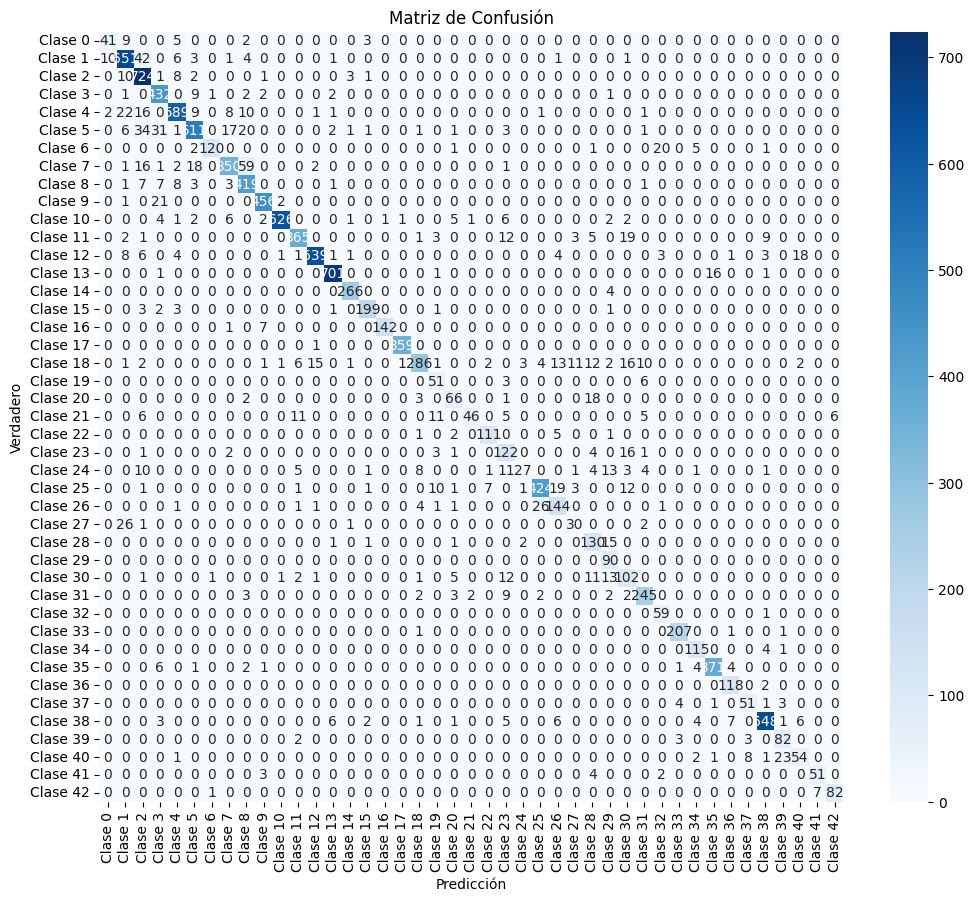

In [5]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar el modelo en el conjunto de prueba y obtener predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcular métricas de evaluación
report = classification_report(y_true, y_pred_classes, target_names=[f'Clase {i}' for i in range(43)])
print("Reporte de Clasificación:\n")
print(report)

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Clase {i}' for i in range(43)], yticklabels=[f'Clase {i}' for i in range(43)])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


## Experimentacion

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 16, 16, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,931 (335.67 KB)

 Trainable params: 85,931 (335.67 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/15
544/544 - 33s - 61ms/step - accuracy: 0.2378 - loss: 2.8582 - val_accuracy: 0.5252 - val_loss: 1.6313 - learning_rate: 5.0000e-04
Epoch 2/15
544/544 - 40s - 74ms/step - accuracy: 0.5660 - loss: 1.4188 - val_accuracy: 0.7256 - val_loss: 0.9547 - learning_rate: 5.0000e-04
Epoch 3/15
544/544 - 32s - 59ms/step - accuracy: 0.6866 - loss: 0.9931 - val_accuracy: 0.7887 - val_loss: 0.7345 - learning_rate: 5.0000e-04
Epoch 4/15
544/544 - 41s - 75ms/step - accuracy: 0.7563 - loss: 0.7769 - val_accuracy: 0.8256 - val_loss: 0.6007 - learning_rate: 5.0000e-04
Epoch 5/15
544/544 - 31s - 57ms/step - accuracy: 0.7982 - loss: 0.6420 - val_accuracy: 0.8474 - val_loss: 0.5371 - learning_rate: 5.0000e-04
Epoch 6/15
544/544 - 42s - 77ms/step - accuracy: 0.8296 - loss: 0.5443 - val_accuracy: 0.8510 - val_loss: 0.4577 - learning_rate: 5.0000e-04
Epoch 7/15
544/544 - 41s - 76ms/step - accuracy: 0.8537 - loss: 0.4719 - val_accuracy: 0.8667 - val_loss: 0.4306 - learning_rate: 5.0000e-04
Epoch 8/15
54

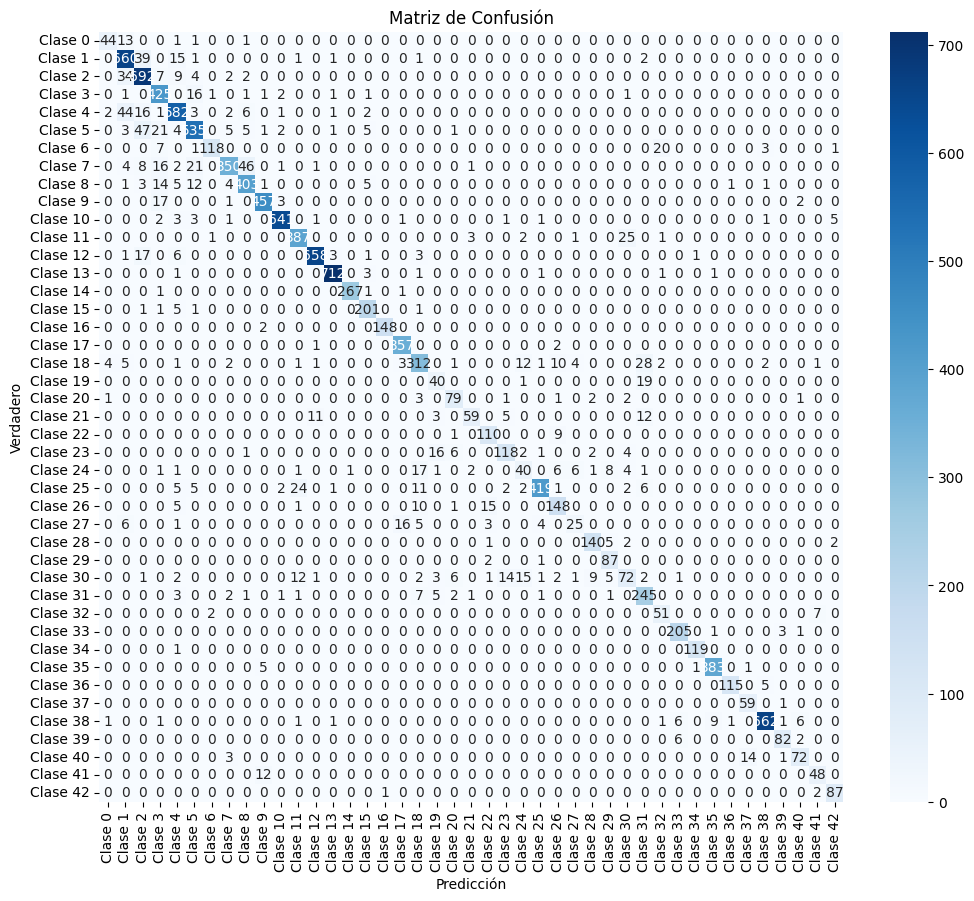

In [6]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Definir la arquitectura Le-Net
modelExperiment = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.25), # Aniadir una dropout layer para prevenir overfitting
    Dense(84, activation='relu'),
    Dropout(0.50), # Aniadir una dropout layer para prevenir overfitting
    Dense(43, activation='softmax')  # Número de clases = 43
])

# Cambiar el optimizador del modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Scheduler del learning rate para que pueda adaptarse dependiendo de como vaya el modelo
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Compilar el modelo
modelExperiment.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
modelExperiment.summary()

# Visualizar el modelo
visualkeras.layered_view(model, legend=True, to_file='modelo.png')

# Definir hiperparámetros
batch_size = 64
epochs = 15

# Entrenamiento del modelo
historyExperiment = modelExperiment.fit(
                    X_train,
                    y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    callbacks=[lr_scheduler]  # Se aniadio el scheduler
                    )

# Evaluación del modelo en el conjunto de prueba
test_lossExperiment, test_accuracyExperiment = modelExperiment.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {test_accuracyExperiment:.2f}')
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar el modelo en el conjunto de prueba y obtener predicciones
y_pred = modelExperiment.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcular métricas de evaluación
report = classification_report(y_true, y_pred_classes, target_names=[f'Clase {i}' for i in range(43)])
print("Reporte de Clasificación:\n")
print(report)

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Clase {i}' for i in range(43)], yticklabels=[f'Clase {i}' for i in range(43)])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 16, 16, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,931 (335.67 KB)

 Trainable params: 85,931 (335.67 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


544/544 - 55s - 101ms/step - accuracy: 0.1370 - loss: 3.2310 - val_accuracy: 0.2995 - val_loss: 2.5020 - learning_rate: 5.0000e-04
Epoch 2/15
544/544 - 51s - 94ms/step - accuracy: 0.2725 - loss: 2.4697 - val_accuracy: 0.3789 - val_loss: 2.0648 - learning_rate: 5.0000e-04
Epoch 3/15
544/544 - 85s - 156ms/step - accuracy: 0.3423 - loss: 2.1294 - val_accuracy: 0.4481 - val_loss: 1.7141 - learning_rate: 5.0000e-04
Epoch 4/15
544/544 - 81s - 149ms/step - accuracy: 0.3998 - loss: 1.8890 - val_accuracy: 0.5172 - val_loss: 1.5100 - learning_rate: 5.0000e-04
Epoch 5/15
544/544 - 52s - 96ms/step - accuracy: 0.4403 - loss: 1.7361 - val_accuracy: 0.5342 - val_loss: 1.3826 - learning_rate: 5.0000e-04
Epoch 6/15
544/544 - 83s - 153ms/step - accuracy: 0.4769 - loss: 1.6159 - val_accuracy: 0.5791 - val_loss: 1.3103 - learning_rate: 5.0000e-04
Epoch 7/15
544/544 - 51s - 94ms/step - accuracy: 0.5023 - loss: 1.5176 - val_accuracy: 0.6109 - val_loss: 1.2313 - learning_rate: 5.0000e-04
Epoch 8/15
544/544 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.00      0.00      0.00        60
     Clase 1       0.62      0.77      0.68       720
     Clase 2       0.59      0.48      0.53       750
     Clase 3       0.71      0.73      0.72       450
     Clase 4       0.81      0.86      0.83       660
     Clase 5       0.47      0.38      0.42       630
     Clase 6       0.75      0.75      0.75       150
     Clase 7       0.47      0.61      0.53       450
     Clase 8       0.65      0.60      0.62       450
     Clase 9       0.96      0.76      0.85       480
    Clase 10       0.82      0.99      0.90       660
    Clase 11       0.69      1.00      0.81       420
    Clase 12       0.99      0.90      0.94       690
    Clase 13       0.96      1.00      0.98       720
    Clase 14       0.94      1.00      0.97       270
    Clase 15       0.93      0.96      0.94       210
    Clase 16       0.96      0.99      0.97       150


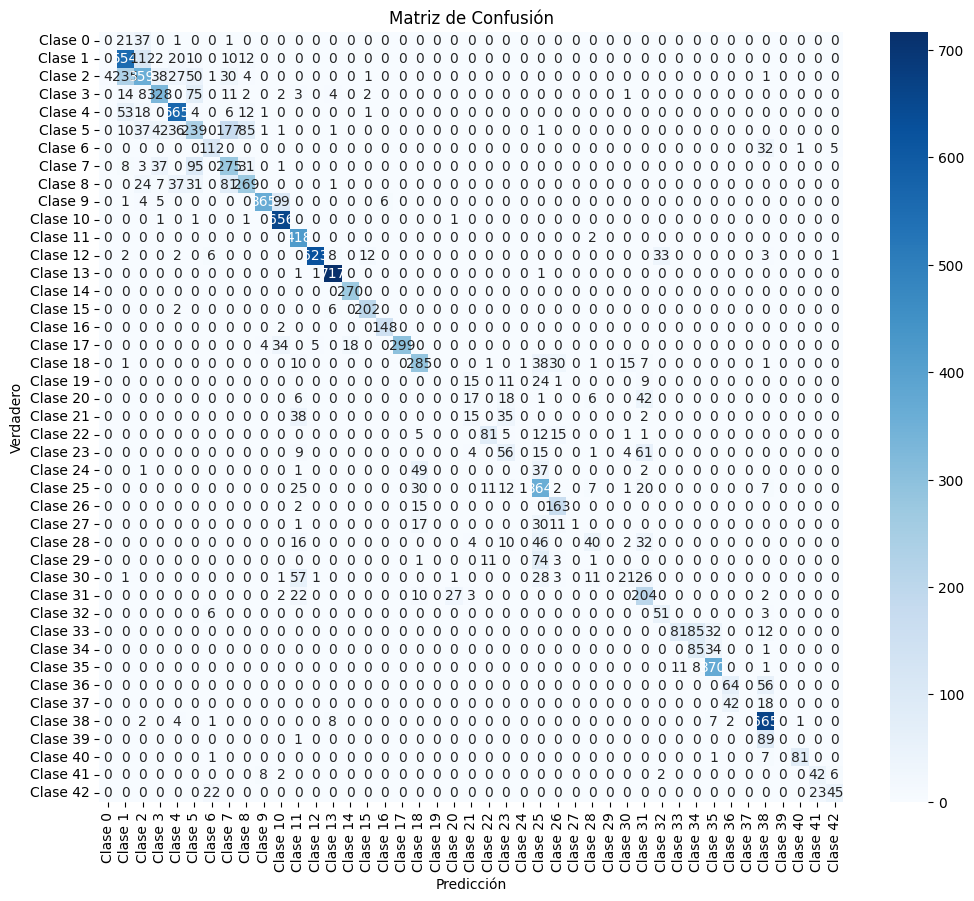

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Alterar las imagenes y generar imagenes nuevas de entrenamiento
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)  # Ajustar el generador a los datos de entrenamiento

# Definir la arquitectura Le-Net
modelExperiment = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.25), # Aniadir una dropout layer para prevenir overfitting
    Dense(84, activation='relu'),
    Dropout(0.50), # Aniadir una dropout layer para prevenir overfitting
    Dense(43, activation='softmax')  # Número de clases = 43
])

# Cambiar el optimizador del modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Scheduler del learning rate para que pueda adaptarse dependiendo de como vaya el modelo
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Compilar el modelo
modelExperiment.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
modelExperiment.summary()

# Visualizar el modelo
visualkeras.layered_view(model, legend=True, to_file='modelo.png')

# Definir hiperparámetros
batch_size = 64
epochs = 15

# Entrenamiento del modelo
historyExperiment = modelExperiment.fit(
                    datagen.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_valid, y_valid),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    callbacks=[lr_scheduler]  # Se aniadio el scheduler
                    )

# Evaluación del modelo en el conjunto de prueba
test_lossExperiment, test_accuracyExperiment = modelExperiment.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {test_accuracyExperiment:.2f}')
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar el modelo en el conjunto de prueba y obtener predicciones
y_pred = modelExperiment.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcular métricas de evaluación
report = classification_report(y_true, y_pred_classes, target_names=[f'Clase {i}' for i in range(43)])
print("Reporte de Clasificación:\n")
print(report)

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Clase {i}' for i in range(43)], yticklabels=[f'Clase {i}' for i in range(43)])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()